<a href="https://colab.research.google.com/github/Vipinanalyst/Vipinanalyst/blob/main/VNL_Data_Prediction_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas pyreadstat

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, precision_score, recall_score

In [6]:
# Read the .sav file using pandas
df = pd.read_spss('total VNL DATA.sav')

# Display the DataFrame
df.head()


,NO,RESULT,ATTACK,BLOCK,SERVE,ERROR
0,1.0,won,37.0,10.0,9.0,20.0
1,2.0,won,61.0,9.0,4.0,23.0
2,3.0,won,59.0,9.0,7.0,24.0
3,4.0,won,53.0,13.0,8.0,29.0
4,5.0,won,66.0,11.0,6.0,28.0


In [7]:
df = df.drop('NO',axis=1)

In [8]:
df = df.rename(columns={'ERROR': 'OPPONENT_ERROR'})

In [9]:
df.head()

,RESULT,ATTACK,BLOCK,SERVE,OPPONENT_ERROR
0,won,37.0,10.0,9.0,20.0
1,won,61.0,9.0,4.0,23.0
2,won,59.0,9.0,7.0,24.0
3,won,53.0,13.0,8.0,29.0
4,won,66.0,11.0,6.0,28.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RESULT          208 non-null    category
 1   ATTACK          208 non-null    float64 
 2   BLOCK           208 non-null    float64 
 3   SERVE           208 non-null    float64 
 4   OPPONENT_ERROR  208 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 6.9 KB


In [11]:
df['RESULT'] = df['RESULT'].map({'won': 1, 'loss': 0})

In [12]:
df.head()

,RESULT,ATTACK,BLOCK,SERVE,OPPONENT_ERROR
0,1,37.0,10.0,9.0,20.0
1,1,61.0,9.0,4.0,23.0
2,1,59.0,9.0,7.0,24.0
3,1,53.0,13.0,8.0,29.0
4,1,66.0,11.0,6.0,28.0


In [13]:
df.isna().sum()

,0
RESULT,0
ATTACK,0
BLOCK,0
SERVE,0
OPPONENT_ERROR,0


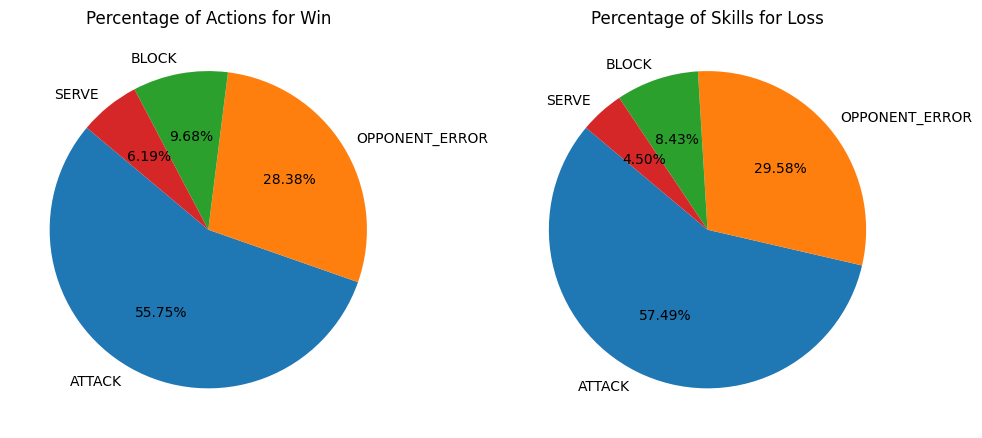

In [14]:
# Filter DataFrame for wins and losses
df_win = df[df['RESULT'] == 1]
df_loss = df[df['RESULT'] == 0]

# Calculate percentages for wins
total_points_win = df_win['ATTACK'].sum() + df_win['OPPONENT_ERROR'].sum() + df_win['BLOCK'].sum() + df_win['SERVE'].sum()
attack_percentage_win = (df_win['ATTACK'].sum() / total_points_win) * 100
error_percentage_win = (df_win['OPPONENT_ERROR'].sum() / total_points_win) * 100
block_percentage_win = (df_win['BLOCK'].sum() / total_points_win) * 100
serve_percentage_win = (df_win['SERVE'].sum() / total_points_win) * 100

# Calculate percentages for losses
total_points_loss = df_loss['ATTACK'].sum() + df_loss['OPPONENT_ERROR'].sum() + df_loss['BLOCK'].sum() + df_loss['SERVE'].sum()
attack_percentage_loss = (df_loss['ATTACK'].sum() / total_points_loss) * 100
error_percentage_loss = (df_loss['OPPONENT_ERROR'].sum() / total_points_loss) * 100
block_percentage_loss = (df_loss['BLOCK'].sum() / total_points_loss) * 100
serve_percentage_loss = (df_loss['SERVE'].sum() / total_points_loss) * 100

# Pie chart for wins
labels = ['ATTACK', 'OPPONENT_ERROR', 'BLOCK', 'SERVE']
sizes_win = [attack_percentage_win, error_percentage_win, block_percentage_win, serve_percentage_win]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_win, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Percentage of Actions for Win')

# Pie chart for losses
sizes_loss = [attack_percentage_loss, error_percentage_loss, block_percentage_loss, serve_percentage_loss]

plt.subplot(1, 2, 2)
plt.pie(sizes_loss, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Percentage of Skills for Loss')

plt.tight_layout()
plt.show()


This diagram shows that even though the attacks contribute more to the points. The team that lost has higher percetnage of attacks and opponent error. The main decisive factor interms of winning was serve and block. For serve there was difference of 1.69% and 1.25% for block which held as a major factor interms of winning.

In [15]:
scaler = MinMaxScaler()

# Fit and transform the numerical columns in the DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized.head()

,RESULT,ATTACK,BLOCK,SERVE,OPPONENT_ERROR
0,1.0,0.180328,0.588235,0.642857,0.394737
1,1.0,0.573770,0.529412,0.285714,0.473684
2,1.0,0.540984,0.529412,0.500000,0.500000
3,1.0,0.442623,0.764706,0.571429,0.631579
4,1.0,0.655738,0.647059,0.428571,0.605263


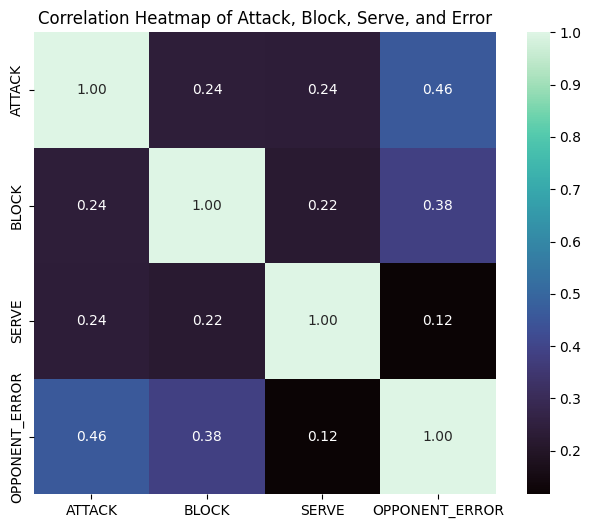

In [16]:
features = ['ATTACK', 'BLOCK', 'SERVE', 'OPPONENT_ERROR']
corr = df_normalized[features].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='mako', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Attack, Block, Serve, and Error')
plt.show()


In [17]:
X = df_normalized.drop('RESULT', axis=1)
y = df_normalized['RESULT']

# Split the data into training and testing sets (90% train, 10% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Split the data into training and testing sets (80% train, 20% test in this example)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets (70% train, 30% test in this example)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the data into training and testing sets (60% train, 40% test in this example)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Split the data into training and testing sets (50% train, 50% test in this example)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.86
Confusion Matrix:
[[13  0]
 [ 3  5]]


In [20]:
mae = mean_absolute_error(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Mean Absolute Error: 0.14
Precision: 1.00
Recall: 0.62


In [21]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.77


In [22]:
ppv = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]) if (conf_matrix[0, 1] + conf_matrix[1, 1]) != 0 else 0

# Calculate NPV
npv = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0]) if (conf_matrix[0, 0] + conf_matrix[1, 0]) != 0 else 0

print(f"PPV (Precision): {ppv:.2f}")
print(f"NPV: {npv:.2f}")

PPV (Precision): 1.00
NPV: 0.81


In [23]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients to see the most important features
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted coefficients
print(sorted_coefficients_df)


          Feature  Coefficient  Absolute Coefficient
2           SERVE     2.412237              2.412237
1           BLOCK     1.533519              1.533519
0          ATTACK     0.699820              0.699820
3  OPPONENT_ERROR     0.219575              0.219575


Precision (Precision_score): Of all the instances predicted as "won" (positive), how many were actually "won" (True Positives)?
 A precision of 0.8 means that, among the instances predicted as "won," 80% were correctly predicted.

Recall (Recall_score): Of all the actual instances of "won," how many did the model correctly predict as "won" (True Positives)?
 A recall of 0.6 means that the model captured 60% of the instances of "won."